Fetching data for BTC-USD...


[*********************100%***********************]  1 of 1 completed


Data Sample:
                    Open          High           Low         Close  \
Date                                                                 
2023-10-31  34500.078125  34719.253906  34083.308594  34667.781250   
2023-11-01  34657.273438  35527.929688  34170.691406  35437.253906   
2023-11-02  35441.578125  35919.843750  34401.574219  34938.242188   
2023-11-03  34942.472656  34942.472656  34133.441406  34732.324219   
2023-11-04  34736.324219  35256.031250  34616.691406  35082.195312   
2023-11-05  35090.011719  35340.339844  34594.242188  35049.355469   
2023-11-06  35044.789062  35286.027344  34765.363281  35037.371094   
2023-11-07  35047.792969  35892.417969  34545.816406  35443.562500   
2023-11-08  35419.476562  35994.417969  35147.800781  35655.277344   
2023-11-09  35633.632812  37926.257812  35592.101562  36693.125000   

               Adj Close       Volume  SMA20  SMA50  RSI  
Date                                                      
2023-10-31  34667.781250  15

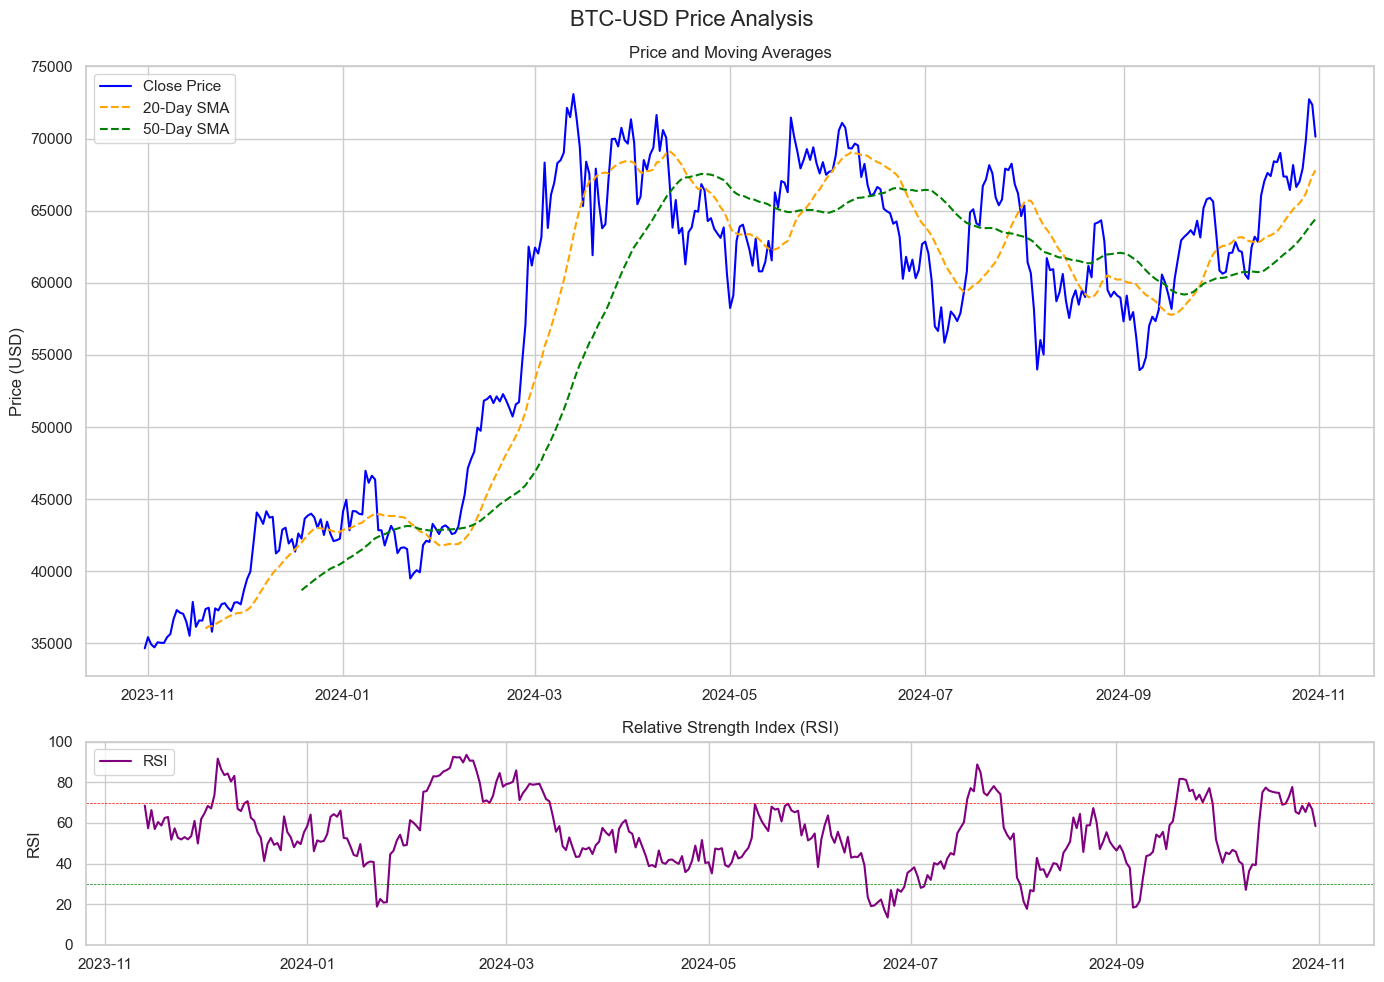

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Fetch historical data for a specific cryptocurrency
def fetch_data(symbol='BTC-USD', period='1y', interval='1d'):
    print(f"Fetching data for {symbol}...")
    data = yf.download(symbol, period=period, interval=interval)
    if data.empty:
        print("No data fetched.")
        return None
    return data

# Calculate moving averages for trend analysis
def calculate_moving_averages(df, short_window=20, long_window=50):
    df['SMA20'] = df['Close'].rolling(window=short_window).mean()
    df['SMA50'] = df['Close'].rolling(window=long_window).mean()
    return df

# Calculate Relative Strength Index (RSI)
def calculate_rsi(df, window=14):
    delta = df['Close'].diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    df['RSI'] = 100 - (100 / (1 + rs))
    return df

# Visualize the data with trend lines and indicators
def plot_data(df, symbol='BTC-USD'):
    sns.set(style="whitegrid")
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(14, 10), gridspec_kw={'height_ratios': [3, 1]})
    fig.suptitle(f'{symbol} Price Analysis', fontsize=16)

    # Plot close price and moving averages
    ax1.plot(df.index, df['Close'], label='Close Price', color='blue', linewidth=1.5)
    ax1.plot(df.index, df['SMA20'], label='20-Day SMA', color='orange', linestyle='--')
    ax1.plot(df.index, df['SMA50'], label='50-Day SMA', color='green', linestyle='--')
    ax1.set_ylabel("Price (USD)")
    ax1.legend(loc='upper left')
    ax1.set_title('Price and Moving Averages')
    
    # Plot RSI
    ax2.plot(df.index, df['RSI'], label='RSI', color='purple', linewidth=1.5)
    ax2.axhline(70, color='red', linestyle='--', linewidth=0.5)
    ax2.axhline(30, color='green', linestyle='--', linewidth=0.5)
    ax2.set_ylim(0, 100)
    ax2.set_ylabel("RSI")
    ax2.set_title('Relative Strength Index (RSI)')
    ax2.legend(loc='upper left')

    plt.tight_layout()
    plt.show()

# Main function to run the entire process
def main():
    # Fetch and process data
    df = fetch_data(symbol='BTC-USD', period='1y', interval='1d')
    if df is not None:
        df = calculate_moving_averages(df)
        df = calculate_rsi(df)

        # Display the first few rows of the data
        print("Data Sample:")
        print(df.head(10))

        # Plot the processed data
        plot_data(df)

if __name__ == "__main__":
    main()
